# LOAN STATUS CLASSIFICATION

## 1. Defining the Question

### a) Specifying the Question

We intend to build a classification model that assesses certain specifics of the client's information for example the client’s current income, credit score, the purpose of the loan with the help of (specific) certain Machine learning algorithms to classify the data into either a good loan application or a bad loan application. This in turn helps the bank predict which loan applications to grant. We will therefore build several models and select the one that works best.

### b) Defining the Metric for Success

Our study will be considered successful if we are able to meet the below objectives.

**Main Objective**

To find the groups of people applying for loans in banks at an individual level by building an unsupervised clustering model. 

**Specific Objectives**

1. To determine the characteristics responsible for customer loan classification through feature selection.

2. To determine the maximum loan limit for certain clients based on these features.

3. To check for anomalies in the number of open accounts by an individual.

4. To make a prediction on whether a client is likely to pay off their loan or not. 

5. To determine the most common purpose for loan application.

6. To find the different groups of people applying for loans.


### c) Understanding the contex

Loan classification, risk management, and provisioning processes are closely intertwined in a bank's operations. Loan pricing, the frequency and intensity of review and analysis, the rigor of monitoring, and the tolerance for loan losses (which should be precisely proportional to the risk rating grade) are all determined by the characteristics of the various risk rating classes. They are  associated with the amount of risk indicated by a loan's assigned risk rating grade), and the amount of risk indicated by the amount of risk to absorb unforeseen losses, regulatory capital is essential. When loan classification systems are combined with management's ability to recognize negative trends, there is an improved decision making process through portfolio management and early reporting techniques.

A loan classification system is an important component of a bank's credit risk assessment and valuation process, as it classifies loans and groups of loans with comparable credit risk characteristics into risk categories. Underwriting and approval, monitoring and managing credit quality, early identification of adverse trends and potentially problem loans, loan loss provisioning, management reporting, and the determination of regulatory capital requirements are all areas where a loan classification system can be useful. Loan classification systems are recognized by both accounting frameworks and Basel II/III regulatory capital frameworks as suitable instruments for accurately assessing credit risk and establishing groupings of loans for collective evaluation for loan loss calculation.

### d). Recording the Experimental Design

1. Data sourcing/loading
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preparation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Conclusion
12. Follow up questions

### e) Data Relevance

We shall be using the datasets below:

i. Credit test dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_test.csv )

ii. Credit train dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_train.csv )

## 2. Reading the Data

In [1]:
# let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split


# let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import load_data.py to read data from file

import load_data
from load_data import Data

In [5]:
# let's create an object of class Data
loan_train = Data('credit_train.csv')
loan_test = Data('credit_test.csv')

### Checking the Data

In [6]:
# lets check our data using print_results function in the load_data module
loan_train.print_results()

Loading the data...
Top part of the data...
                                Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            Na

In [7]:
# print results for loan_test object
loan_test.print_results()

Loading the data...
Top part of the data...
                                Loan ID                           Customer ID  \
0  f738779f-c726-40dc-92cf-689d73af533d  ded0b3c3-6bf4-4091-8726-47039f2c1b90   
1  6dcc0947-164d-476c-a1de-3ae7283dde0a  1630e6e3-34e3-461a-8fda-09297d3140c8   
2  f7744d01-894b-49c3-8777-fc6431a2cff1  2c60938b-ad2b-4702-804d-eeca43949c52   
3  83721ffb-b99a-4a0f-aea5-ef472a138b41  12116614-2f3c-4d16-ad34-d92883718806   
4  08f3789f-5714-4b10-929d-e1527ab5e5a3  39888105-fd5f-4023-860a-30a3e6f5ccb7   

   Current Loan Amount        Term  Credit Score  Annual Income  \
0             611314.0  Short Term         747.0      2074116.0   
1             266662.0  Short Term         734.0      1919190.0   
2             153494.0  Short Term         709.0       871112.0   
3             176242.0  Short Term         727.0       780083.0   
4             321992.0  Short Term         744.0      1761148.0   

  Years in current job Home Ownership             Purpose  Monthly

## 3. External Data Validation



The data was provided by the bank about the brand and was based on a previous related banking data, there is no need for external validation.

## 4. Data Preparation

### a) Uniformity

In [8]:
# let's create a function to check the names of the columns and replace the white spaces with underscore
def replace_white_spaces(df):
    # let's see the columns of the dataframe
    df.columns
    # let's replace the white spaces with underscore
    df.columns = [col.replace(' ', '_') for col in df.columns]
    print(df.columns)

In [9]:
# let's call the uniformity function
replace_white_spaces(loan_train.data)

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')


* We removed the white spaces from the column names and replaced them with underscore.

* The data is already in a uniform format.

### b) Completeness

In [11]:
# let's create a function to drop columns
def drop_columns(df, columns):
    # let's drop the columns
    df.drop(columns, axis=1, inplace=True)
    print(df.columns)

In [12]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

Missing_Values  Percentage
Months_since_last_delinquent           53655   53.380624
Credit_Score                           19668   19.567423
Annual_Income                          19668   19.567423
Years_in_current_job                    4736    4.711781
Bankruptcies                             718    0.714328
Tax_Liens                                524    0.521320
Maximum_Open_Credit                      516    0.513361
Years_of_Credit_History                  514    0.511372
Current_Credit_Balance                   514    0.511372
Number_of_Credit_Problems                514    0.511372
Number_of_Open_Accounts                  514    0.511372
Loan_ID                                  514    0.511372
Monthly_Debt                             514    0.511372
Customer_ID                              514    0.511372
Home_Ownership                           514    0.511372
Term                                     514    0.511372
Current_Loan_Amount                      514    0.511372
Loan_Status                              514    0.511372
Purpose                                  514    0.511372

* The data has alot of missing values

In [13]:
# let's drop the Months_since_last_delinquent column
drop_columns(loan_train.data, ['Months_since_last_delinquent'])

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens'],
      dtype='object')


In [14]:
# let's impute Credit_Score and Annual_Income with the median
loan_train.data['Credit_Score'].fillna(loan_train.data['Credit_Score'].median(), inplace=True)
loan_train.data['Annual_Income'].fillna(loan_train.data['Annual_Income'].median(), inplace=True)

In [15]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

Missing_Values  Percentage
Years_in_current_job                 4736    4.711781
Bankruptcies                          718    0.714328
Tax_Liens                             524    0.521320
Maximum_Open_Credit                   516    0.513361
Monthly_Debt                          514    0.511372
Current_Credit_Balance                514    0.511372
Number_of_Credit_Problems             514    0.511372
Number_of_Open_Accounts               514    0.511372
Years_of_Credit_History               514    0.511372
Loan_ID                               514    0.511372
Customer_ID                           514    0.511372
Home_Ownership                        514    0.511372
Term                                  514    0.511372
Current_Loan_Amount                   514    0.511372
Loan_Status                           514    0.511372
Purpose                               514    0.511372
Annual_Income                           0    0.000000
Credit_Score                            0    0.000000

In [16]:
# let's drop the remmaining missing values
loan_train.data.dropna(inplace=True)

In [17]:
# let's check the data for missing values 
loan_train.data.isnull().sum().sum()

0

* The data does not have any missing values.

### c) Consistency

In [18]:
# let's create a function to check the data as a percentage for duplicates and drop them
def drop_duplicates(df):
    duplicate_values = df.duplicated().sum()
    percentage = duplicate_values / df.shape[0] * 100
    print(f'The data has {duplicate_values} duplicates and it is {percentage}% of the data')

    print("Dropping duplicates...")
    # let's drop the duplicates
    df.drop_duplicates(inplace=True)

    # let's check for duplicates again
    print(f'The data now has {df.duplicated().sum()} duplicates after dropping')

In [19]:
# let's check for duplicates and drop them
drop_duplicates(loan_train.data)

The data has 9781 duplicates and it is 10.234169003473822% of the data
Dropping duplicates...
The data now has 0 duplicates after dropping


* The data does not have duplicate values.

### d) Accuracy

In [20]:
# let's check the datatypes of the data
loan_train.data.dtypes

# let's drop customer id and loan id
drop_columns(loan_train.data, ['Customer_ID', 'Loan_ID'])

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')


In [21]:
# let's convert Loan_Status and Term to binary
loan_train.data['Loan_Status'] = loan_train.data['Loan_Status'].map({'Fully Paid': 1, 'Charged Off': 0})
loan_train.data['Term'] = loan_train.data['Term'].map({'Short Term': 0, 'Long Term': 1})
loan_train.data_head()

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0            1             445412.0     0         709.0      1167493.0   
1            1             262328.0     0         724.0      1174162.0   
2            1           99999999.0     0         741.0      2231892.0   
3            1             347666.0     1         721.0       806949.0   
4            1             176220.0     0         724.0      1174162.0   

  Years_in_current_job Home_Ownership             Purpose  Monthly_Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years_of_Credit_History  Number_of_Open_Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax_Liens  
0           1.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0

### e) Anomalies

In [22]:
# let's create an in if statement that divides the credit score by 10 if its value is greater than 850 and drops the value if its less than 300
# since credit score values should range from 300 to 850, let's replace divide values larger than 850 in the credit score column by 10

loan_train.data['Credit_Score'] = loan_train.data['Credit_Score'].apply(
    lambda val: (val / 10) if val > 850 else val)

# check for null values in the Credit_Score column
loan_train.data['Credit_Score'].isnull().sum()

loan_train.data_head()

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0            1             445412.0     0         709.0      1167493.0   
1            1             262328.0     0         724.0      1174162.0   
2            1           99999999.0     0         741.0      2231892.0   
3            1             347666.0     1         721.0       806949.0   
4            1             176220.0     0         724.0      1174162.0   

  Years_in_current_job Home_Ownership             Purpose  Monthly_Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years_of_Credit_History  Number_of_Open_Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax_Liens  
0           1.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0

In [23]:
# let's create a variable to store all columns with numeric data types
numeric_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype in ['int64', 'float64']]
numeric_columns

['Loan_Status',
 'Current_Loan_Amount',
 'Term',
 'Credit_Score',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [24]:
# let's remove loan status and term from the numeric columns
numeric_columns.remove('Loan_Status')
numeric_columns.remove('Term')

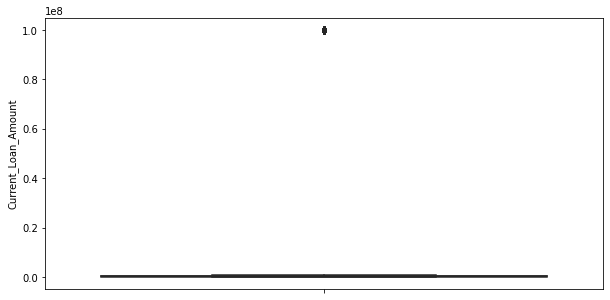

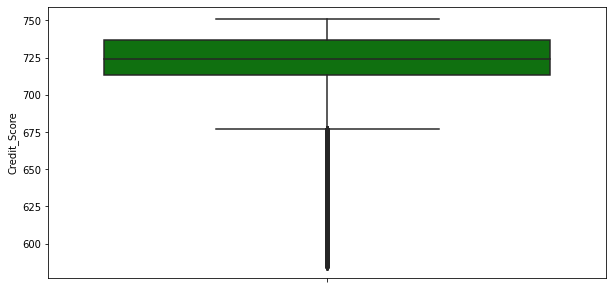

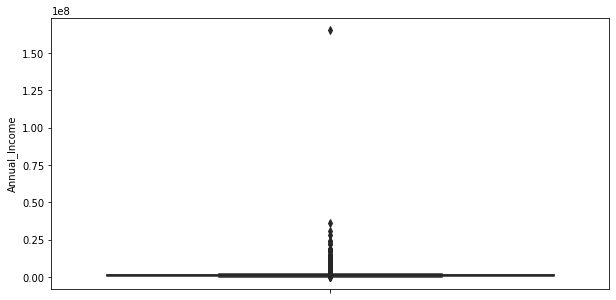

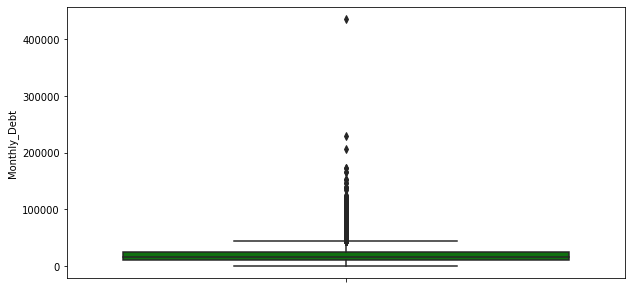

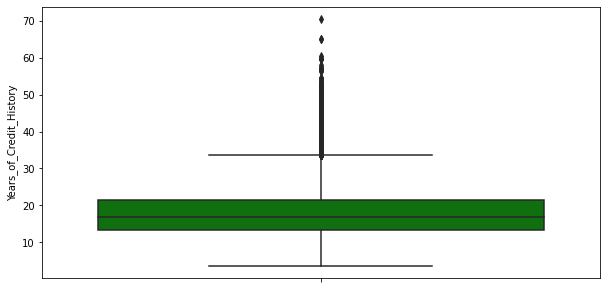

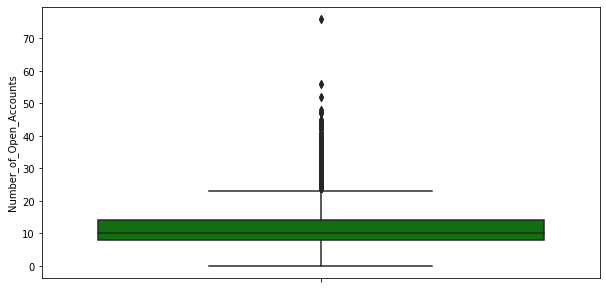

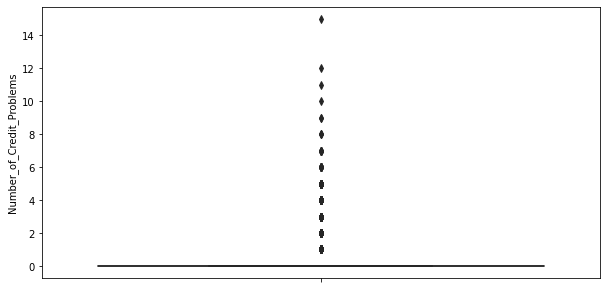

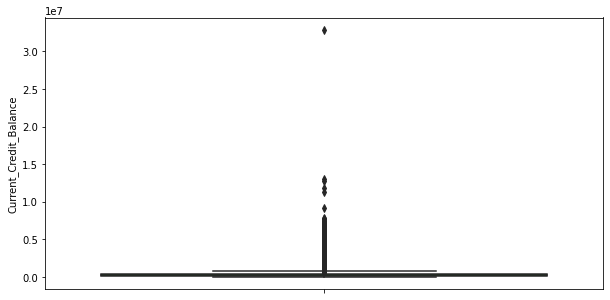

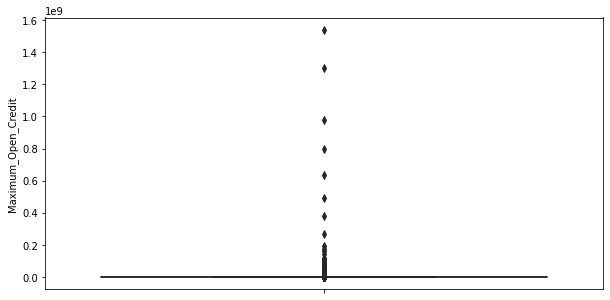

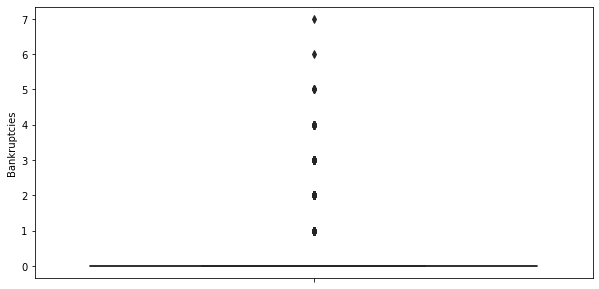

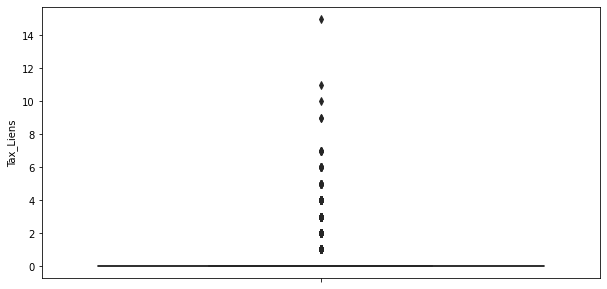

In [25]:
# let's check the columns with outliers using a boxplot using a for loop for numeric columns in a vertical orientation using seaborn
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot( y=loan_train.data[col], orient='h', color='green')
    plt.show()

* The data has outliers which will not be dropped because they represent the actual values in the data.

## 5. Exploratory Data Analysis

### a) Univariate Analysis

In [26]:
# let's create a function to get the skewness of the data
def get_skewness(df, columns):
    skew_df = pd.DataFrame({'Skewness': df[columns].apply(lambda x: x.skew())})
    print(skew_df)

# let's write a function to get the kurtosis
def get_Kurt(df, columns):
    kurtosis_df = pd.DataFrame({'Kurtosis': df[columns].apply(lambda x: x.kurtosis())})
    print(kurtosis_df)

In [27]:
# let's print the description of the data
loan_train.data.describe()

Loan_Status  Current_Loan_Amount          Term  Credit_Score  \
count  85791.000000         8.579100e+04  85791.000000  85791.000000   
mean       0.751547         1.312880e+07      0.270075    719.713268   
std        0.432118         3.336658e+07      0.444001     25.096432   
min        0.000000         1.542200e+04      0.000000    585.000000   
25%        1.000000         1.858560e+05      0.000000    713.000000   
50%        1.000000         3.204740e+05      0.000000    724.000000   
75%        1.000000         5.362060e+05      1.000000    737.000000   
max        1.000000         1.000000e+08      1.000000    751.000000   

       Annual_Income   Monthly_Debt  Years_of_Credit_History  \
count   8.579100e+04   85791.000000             85791.000000   
mean    1.349192e+06   18641.047257                18.037267   
std     9.962933e+05   12197.799878                 6.815781   
min     7.662700e+04       0.000000                 3.600000   
25%     9.500950e+05   10404.590000                13.400000   
50%     1.174162e+06   16363.560000                16.900000   
75%     1.512400e+06   24157.455000                21.500000   
max     1.655574e+08  435843.280000                70.500000   

       Number_of_Open_Accounts  Number_of_Credit_Problems  \
count             85791.000000               85791.000000   
mean                 11.179529                   0.159143   
std                   5.007267                   0.469544   
min                   0.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  76.000000                  15.000000   

       Current_Credit_Balance  Maximum_Open_Credit  Bankruptcies     Tax_Liens  
count            8.579100e+04         8.579100e+04  85791.000000  85791.000000  
mean             2.962821e+05         7.748651e+05      0.110816      0.027719  
std              3.737015e+05         8.932842e+06      0.341166      0.251168  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.146270e+05         2.794110e+05      0.000000      0.000000  
50%              2.120970e+05         4.764760e+05      0.000000      0.000000  
75%              3.707755e+05         7.950250e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

In [28]:
# let's get the skewness of the data
get_skewness(loan_train.data, numeric_columns)

                             Skewness
Current_Loan_Amount          2.219423
Credit_Score                -1.757022
Annual_Income               56.211964
Monthly_Debt                 2.278639
Years_of_Credit_History      1.026573
Number_of_Open_Accounts      1.180051
Number_of_Credit_Problems    4.966310
Current_Credit_Balance      14.799388
Maximum_Open_Credit        127.265619
Bankruptcies                 3.578498
Tax_Liens                   15.899338


* The variables are right skewed. The values are positive.

In [29]:
# let's check for kurtosis of the data
get_Kurt(loan_train.data, numeric_columns)

                               Kurtosis
Current_Loan_Amount            2.926143
Credit_Score                   3.959571
Annual_Income               8667.271072
Monthly_Debt                  24.318686
Years_of_Credit_History        1.645755
Number_of_Open_Accounts        3.083973
Number_of_Credit_Problems     51.441956
Current_Credit_Balance       789.748847
Maximum_Open_Credit        18435.876851
Bankruptcies                  18.902574
Tax_Liens                    427.782584


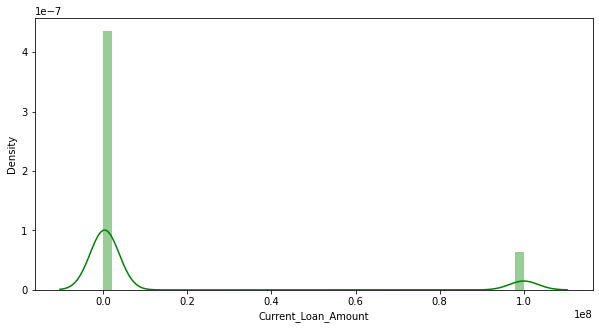

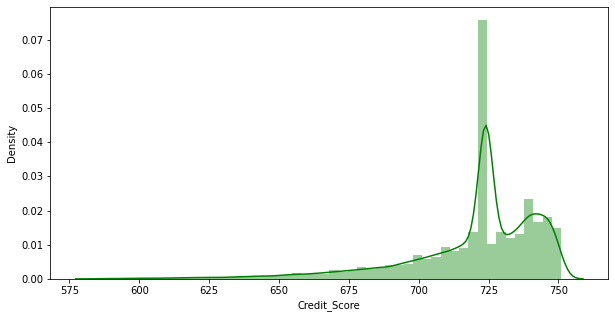

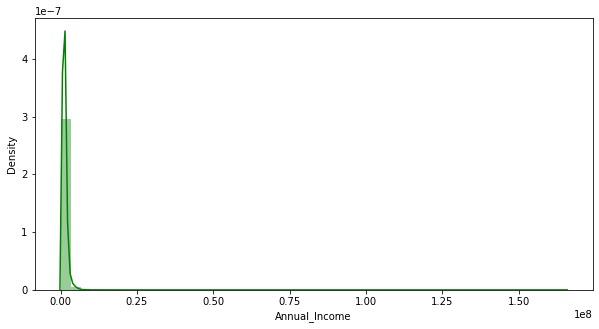

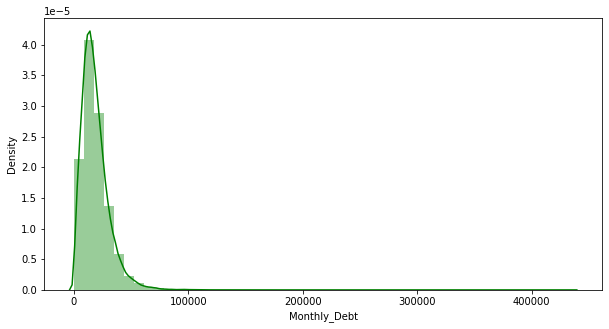

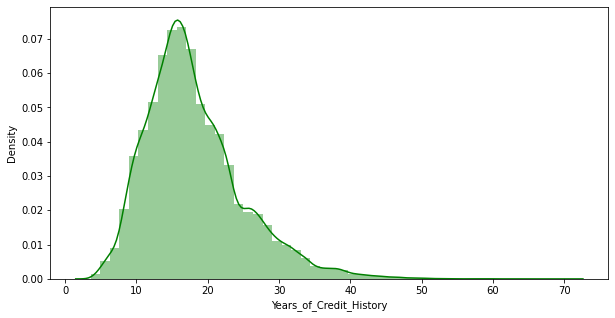

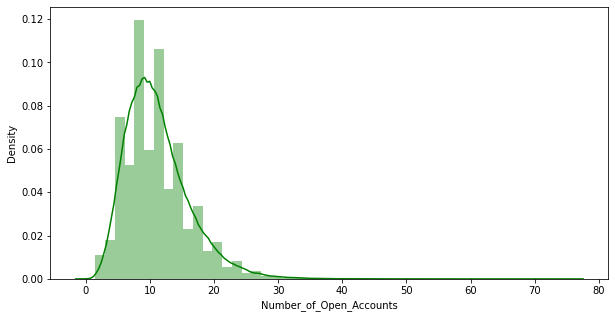

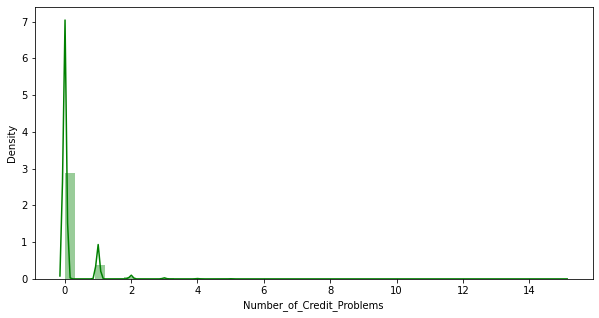

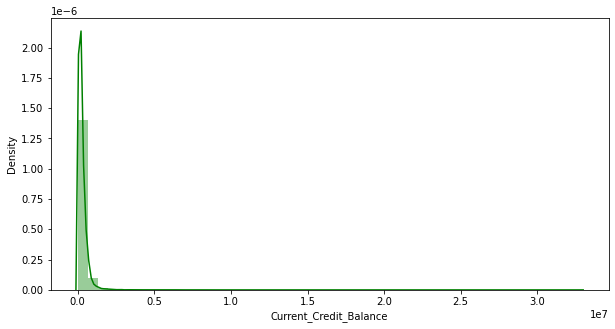

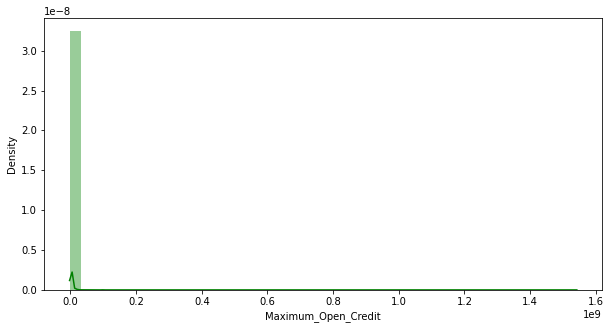

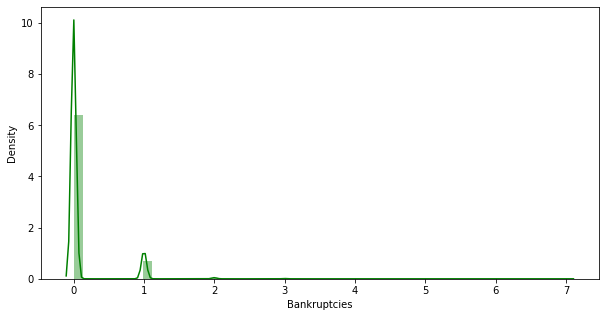

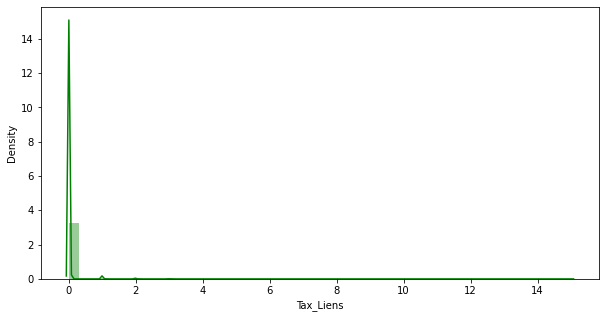

In [30]:
# let's get the distribution plot of the data using a for loop of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(loan_train.data[col], color='green')
    plt.show()

* The data is positively skewed and leptokurtic.

In [31]:
# let's store the columns with object data types in a variable
cat_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype == 'object']
cat_columns

['Years_in_current_job', 'Home_Ownership', 'Purpose']

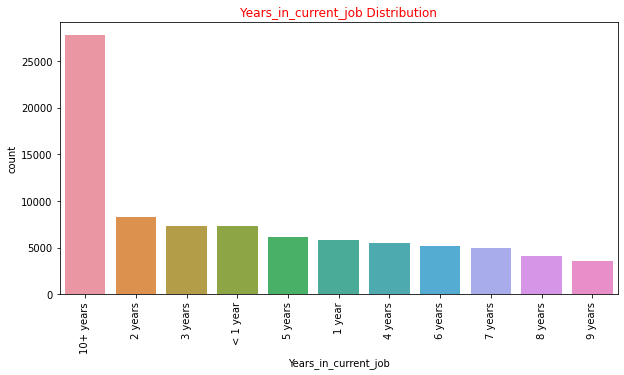

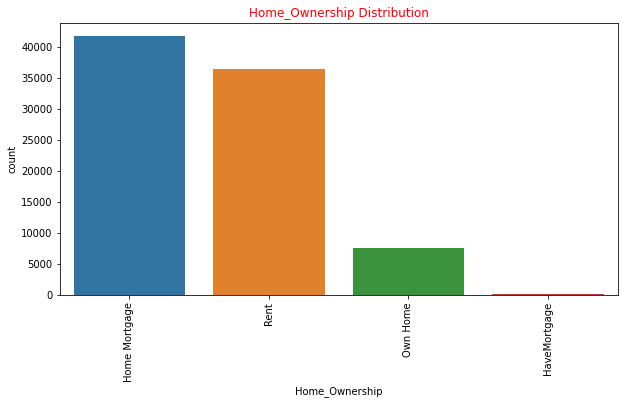

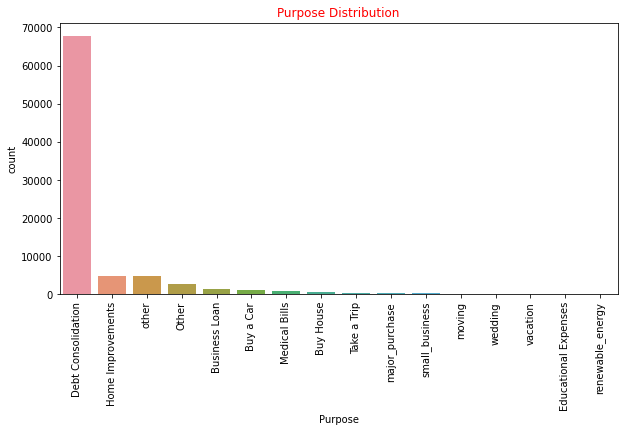

In [32]:
# let's plot a bar graph of the data using a for loop of categorical columns
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=loan_train.data, order= loan_train.data[col].value_counts().index)
    plt.title(f'{col} Distribution', color='red')
    plt.show()

### b) Bivariate Analysis

#### Categorical vs Categorical Features

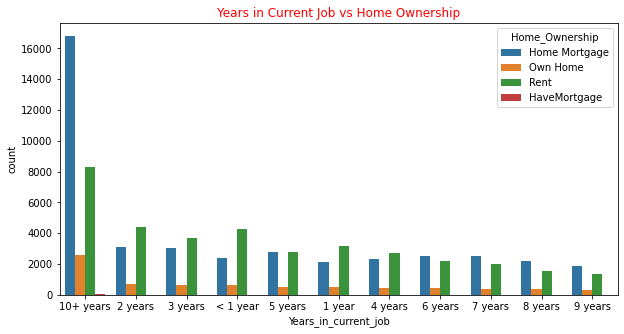

In [33]:
# categorical vs categorical

# let's create a stack barplot of years in current job and home ownership and sort in descending order

plt.figure(figsize=(10, 5))
sns.countplot(x='Years_in_current_job', hue='Home_Ownership', data=loan_train.data,
              order=loan_train.data['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Home Ownership', color='red')
plt.show()

#### Categorical vs Numerical Features

In [34]:
loan_train.data.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

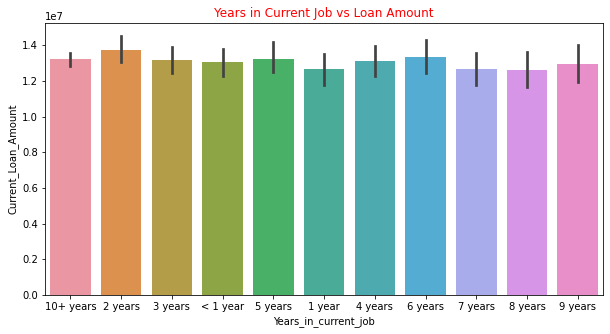

In [35]:
# Categorical vs Numeric

# let's create a barplot of Years in current job and Loan Amount
plt.figure(figsize=(10, 5))
sns.barplot(x='Years_in_current_job', y='Current_Loan_Amount', data=loan_train.data,
            order=loan_train.data['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Loan Amount', color='red')
plt.show()


#### Numerical vs Numerical Features

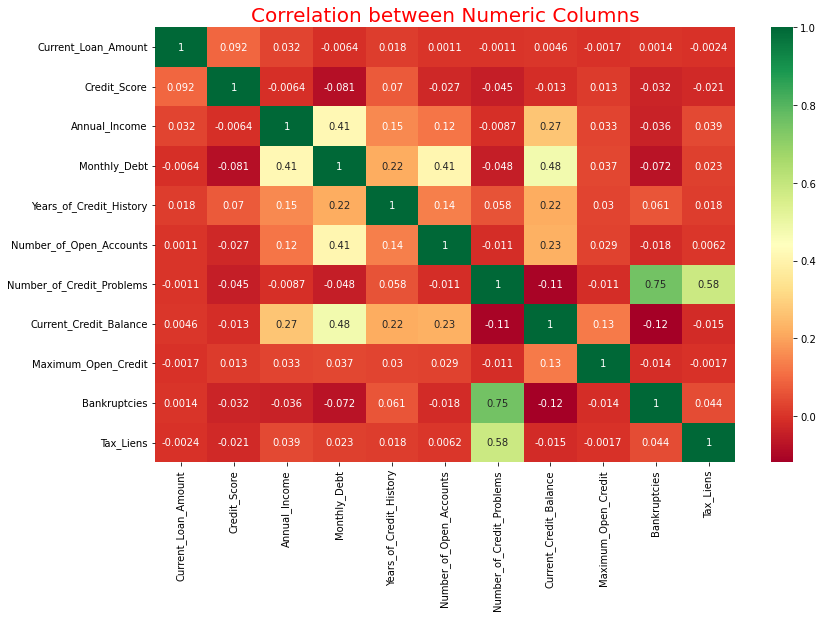

In [74]:
# Numerical vs Numerical: 
# 
# Covariance, Correlation and Scatter Plot

# let's get plot a heatmap of the correlation between the numeric columns
plt.figure(figsize=(13, 8))
sns.heatmap(loan_train.data[numeric_columns].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation between Numeric Columns', color='red', fontsize=20)
plt.show()


<Figure size 936x576 with 0 Axes>

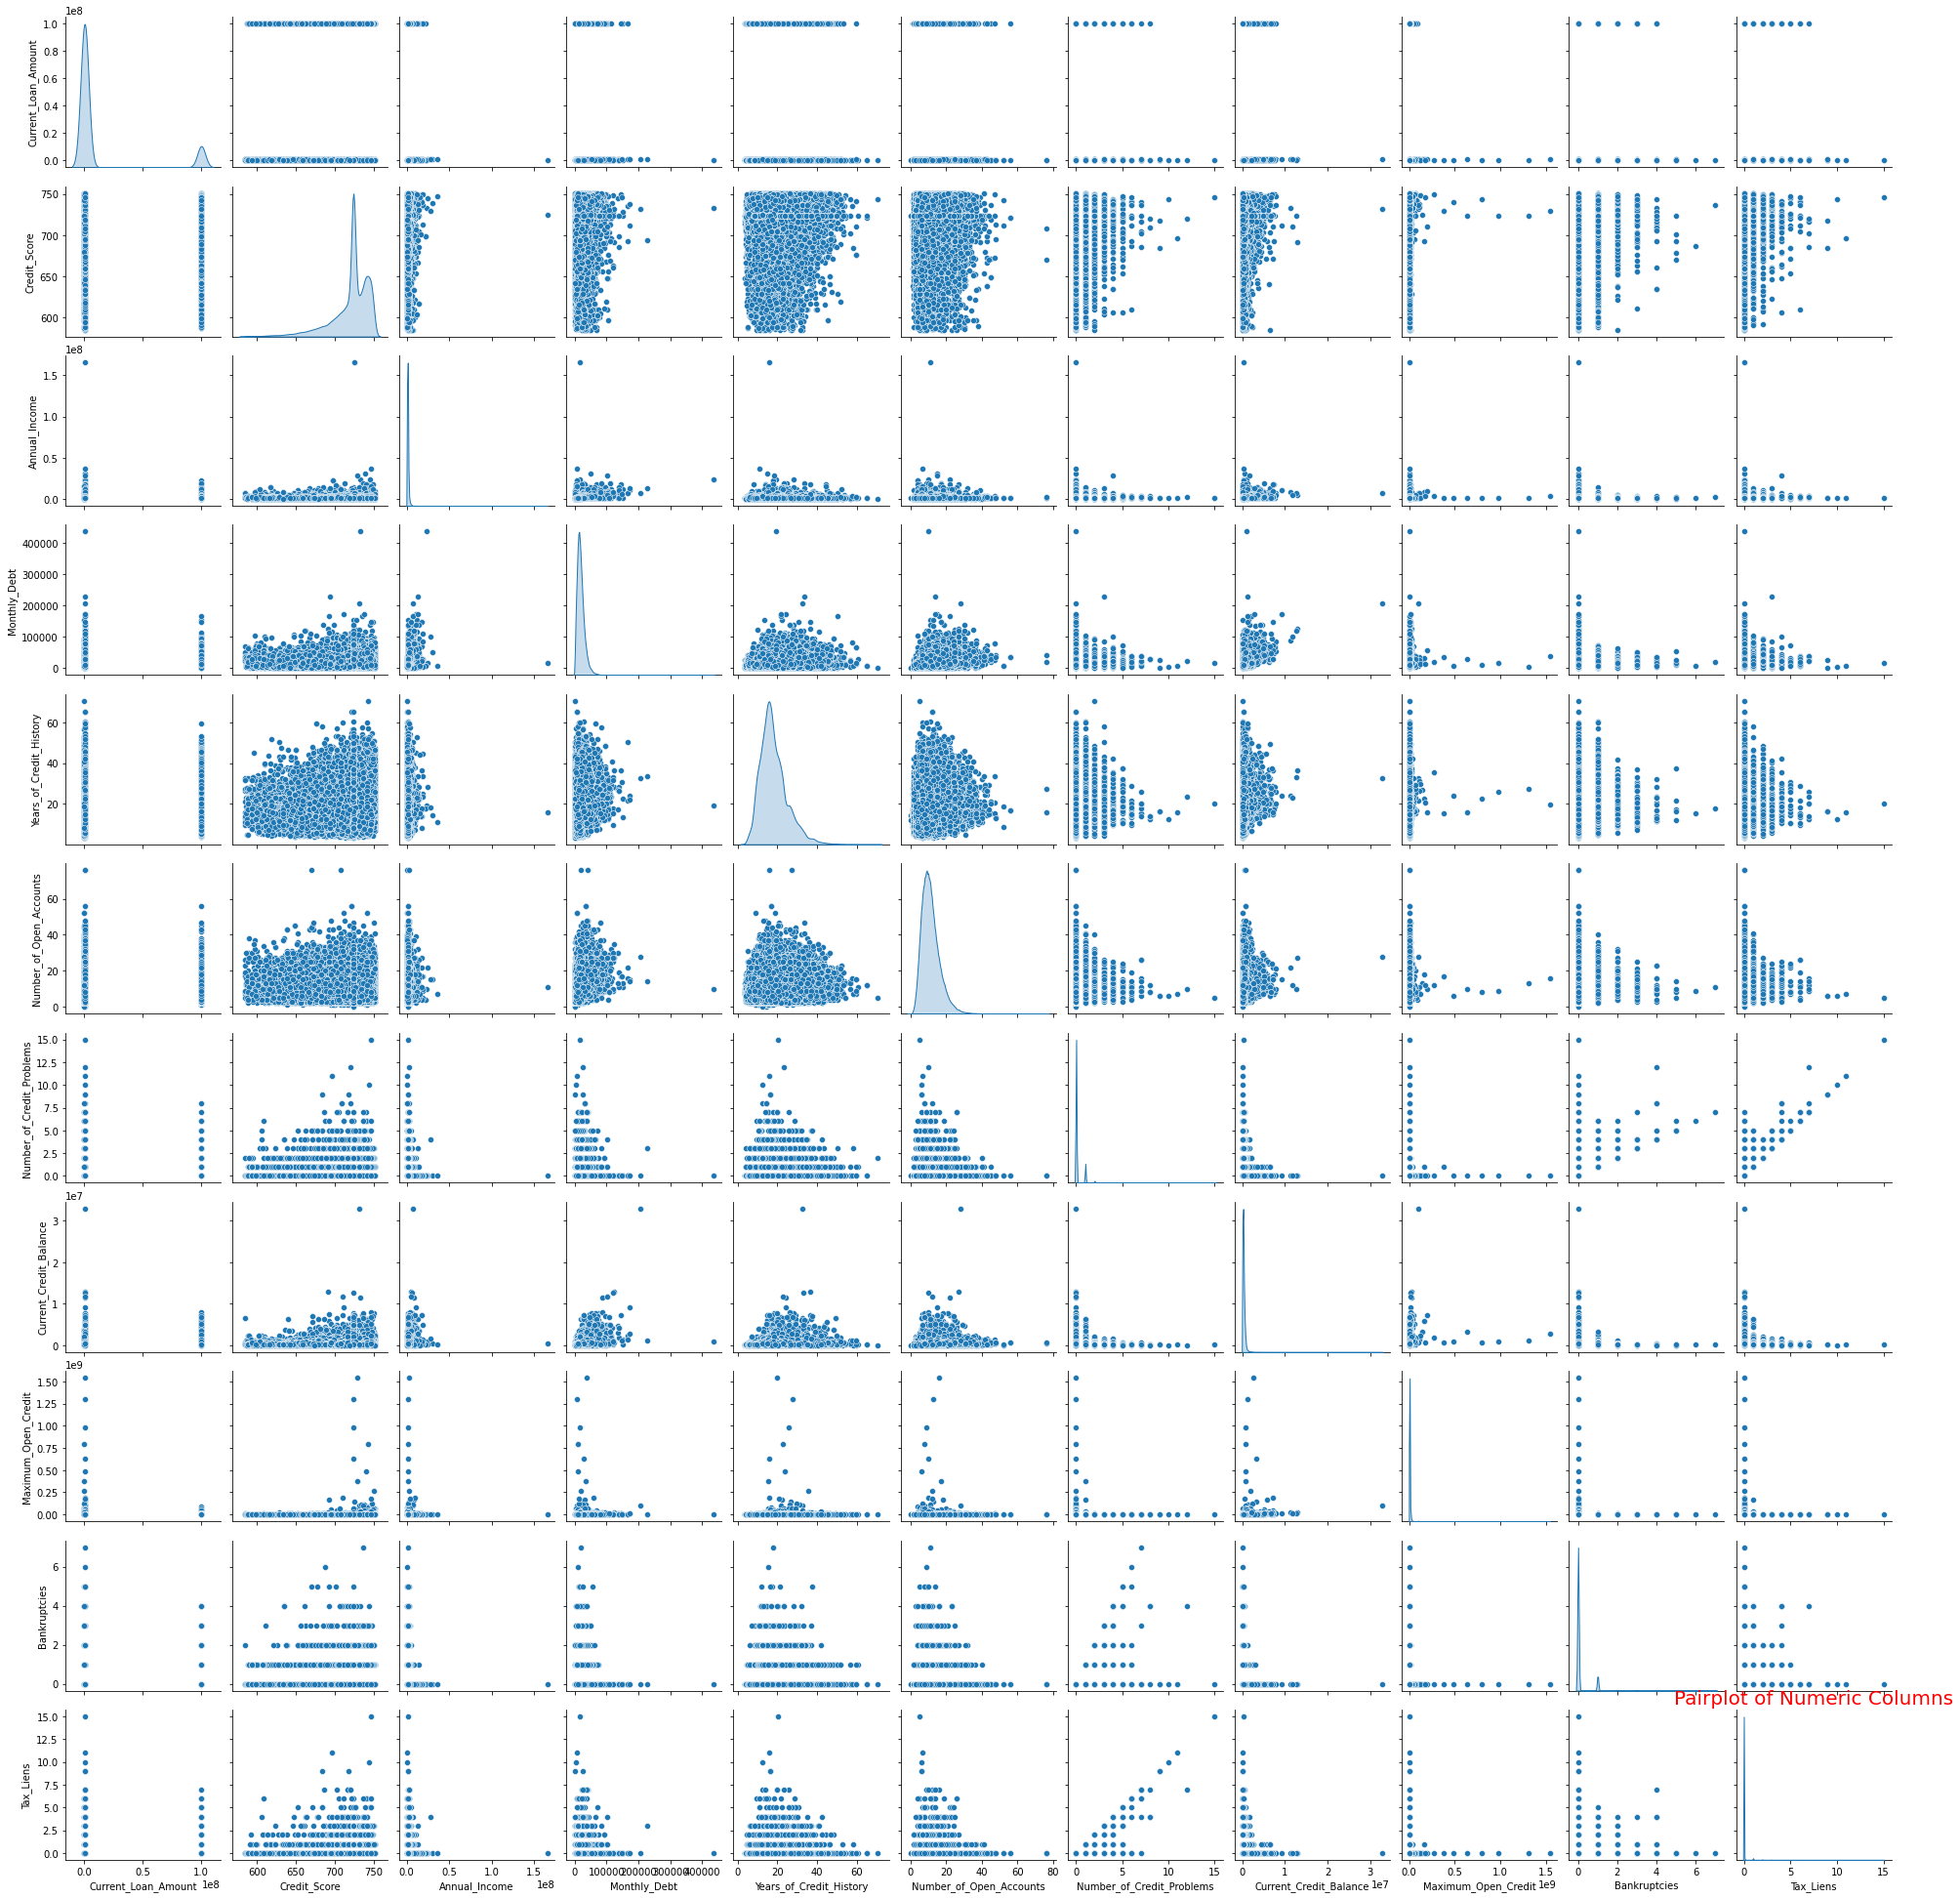

In [35]:
# let's import kdeplot from seaborn
from seaborn import kdeplot
# let's plot the pairplot of the numeric columns
plt.figure(figsize=(13, 8))
sns.pairplot(loan_train.data[numeric_columns], diag_kind='kde', palette='husl')
plt.title('Pairplot of Numeric Columns', color='red', fontsize=20)
plt.show()

## 6. Modeling

### Feature Engineering

In [36]:
# let's encode the categorical columns

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# let's create a function to encode the categorical columns
def encode_cat_columns(data):
    for col in cat_columns:
        data[col] = le.fit_transform(data[col])
    return data

# let's encode the categorical columns
loan_train.data = encode_cat_columns(loan_train.data)
loan_train.data_head()

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0            1             445412.0     0         709.0      1167493.0   
1            1             262328.0     0         724.0      1174162.0   
2            1           99999999.0     0         741.0      2231892.0   
3            1             347666.0     1         721.0       806949.0   
4            1             176220.0     0         724.0      1174162.0   

   Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                     8               1        5       5214.74   
1                     1               1        3      33295.98   
2                     8               2        3      29200.53   
3                     3               2        3       8741.90   
4                     5               3        3      20639.70   

   Years_of_Credit_History  Number_of_Open_Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax_Liens  
0           1.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0

we shall replace all values in the credit score variable as follows:
 * values between 580 and 669 with 0 for 'fair'
 * values between 670 and 739 with 1 for 'good'
 * values between 740 and 799 with 2 for 'very good'


In [37]:
# let's create an empty column called credit class
loan_train.data['Credit_Class'] = 0

In [38]:
loan_train.data.head()

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0            1             445412.0     0         709.0      1167493.0   
1            1             262328.0     0         724.0      1174162.0   
2            1           99999999.0     0         741.0      2231892.0   
3            1             347666.0     1         721.0       806949.0   
4            1             176220.0     0         724.0      1174162.0   

   Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                     8               1        5       5214.74   
1                     1               1        3      33295.98   
2                     8               2        3      29200.53   
3                     3               2        3       8741.90   
4                     5               3        3      20639.70   

   Years_of_Credit_History  Number_of_Open_Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax_Liens  Credit_Class  
0           1.0        0.0             0  
1           0.0        0.0             0  
2           0.0        0.0             0  
3           0.0        0.0             0  
4           0.0        0.0             0

In [39]:
# a functtion to populate the credit class column
def classify_credit_score(data):
    data.loc[(data['Credit_Score'] >= 580) & (data['Credit_Score'] <= 669), 'Credit_Class'] = 0
    data.loc[(data['Credit_Score'] >= 670) & (data['Credit_Score'] <= 739), 'Credit_Class'] = 1
    data.loc[(data['Credit_Score'] >= 740) & (data['Credit_Score'] <= 799), 'Credit_Class'] = 2
    return data.head()


In [40]:
# let's check the minimum and maximum values for current loan amount when credit class is 0
loan_train.data.loc[loan_train.data['Credit_Class'] == 0, 'Current_Loan_Amount'].mean()

13128803.586844774

In [45]:
loan_train.data.loc[loan_train.data['Credit_Class'] == 1, 'Current_Loan_Amount'].mean()

10673235.389066663

In [46]:
loan_train.data.loc[loan_train.data['Credit_Class'] == 2, 'Current_Loan_Amount'].mean()

22680366.60118879

* The analysis above predicts loan one is qualified for based on the credit class and the mean of the current loan amount.

In [47]:
# let's populate the credit class column with proper values
classify_credit_score(loan_train.data)

Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0            1             445412.0     0         709.0      1167493.0   
1            1             262328.0     0         724.0      1174162.0   
2            1           99999999.0     0         741.0      2231892.0   
3            1             347666.0     1         721.0       806949.0   
4            1             176220.0     0         724.0      1174162.0   

   Years_in_current_job  Home_Ownership  Purpose  Monthly_Debt  \
0                     8               1        5       5214.74   
1                     1               1        3      33295.98   
2                     8               2        3      29200.53   
3                     3               2        3       8741.90   
4                     5               3        3      20639.70   

   Years_of_Credit_History  Number_of_Open_Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number_of_Credit_Problems  Current_Credit_Balance  Maximum_Open_Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax_Liens  Credit_Class  
0           1.0        0.0             1  
1           0.0        0.0             1  
2           0.0        0.0             2  
3           0.0        0.0             1  
4           0.0        0.0             1

* We created a column Credit_Class and populated it with values corresponding to the credit score in a range from 1 to 5.

#### Class Imbalance

In [48]:
# class imbalance

# let's import counters from imbalanced-learn
from collections import Counter

# import smote(synthetic minority over-sampling)
from imblearn.over_sampling import SMOTE

# define independent and dependent variables
X = loan_train.data.drop(['Credit_Score', 'Credit_Class'],
                         axis=1)    # independent variables
y = loan_train.data['Credit_Class']     # dependent variables

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 63439, 2: 63439, 0: 63439})


In [49]:
sum(counter.values())

190317

### a) Supervised Learning Approach

In [50]:
# let's divide the data into independent and dependent variables
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# divide the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression Model

In [52]:
# import logistic regression model
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# create a logistic regression object
logreg = LogisticRegression()

# fit model to our data
logreg.fit(X_train, y_train)

# let's predict the test data
y_pred = logreg.predict(X_test)

# let's check the accuracy of the model using confusion matrix

confusion_matrix(y_test, y_pred)


array([[9109, 1932, 1702],
       [3082, 5093, 4444],
       [ 446, 2530, 9726]])

In [53]:
# let's get the f1 score of the model
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.619766479626764

In [54]:
# let's get recall of the model to check for sensitivity of the model
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.6286254728877679

* The model predicted 23,821 observations correctly resulting in 62.89% recall to represent the relevant cases and an f1 score of 0.62.

In [55]:
# let's apply for cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1_weighted')
print(scores)

[0.61914907 0.61322701 0.61503241 0.61960162 0.61525645 0.62071775
 0.62359516 0.62180577 0.62002771 0.61861787]


In [56]:
# let's find the average of scores
scores.mean()

0.6187030825634051

* We will revert to another model to improve the model performance.

#### Random Forest Model

In [57]:
# import random forest model
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# create a random forest object
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to our data
rf.fit(X_train, y_train)

# let's predict the test data
y_pred = rf.predict(X_test)

# let's check the accuracy of the model using confusion matrix
confusion_matrix(y_test, y_pred)


array([[12030,   403,   310],
       [  922,  9846,  1851],
       [  164,  1167, 11371]])

In [58]:
# let's get the recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8734499789827659

In [59]:
# let's get the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.8723866992862428

* Our random forest model has classified 33279 out of 38064 and has an f1_score of 87.23%. We shall use different hyperparameters to improve our model.

In [60]:
# let's get the classification report
from sklearn.metrics import classification_report

# let's get the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12743
           1       0.86      0.78      0.82     12619
           2       0.84      0.90      0.87     12702

    accuracy                           0.87     38064
   macro avg       0.87      0.87      0.87     38064
weighted avg       0.87      0.87      0.87     38064



In [61]:
# Get numerical feature importances

test_features = X.columns.to_list()

# pick a specific tree from the forest
tree = rf.estimators_[50]

importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2))
                       for feature, importance in zip(test_features, importances)]

# this already has all the information we need, but it can be tricky to see when there are too many features.
print(feature_importances)
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(
    feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair))
 for pair in feature_importances]


[('Loan_Status', 0.03), ('Current_Loan_Amount', 0.08), ('Term', 0.17), ('Annual_Income', 0.15), ('Years_in_current_job', 0.04), ('Home_Ownership', 0.03), ('Purpose', 0.04), ('Monthly_Debt', 0.07), ('Years_of_Credit_History', 0.08), ('Number_of_Open_Accounts', 0.07), ('Number_of_Credit_Problems', 0.04), ('Current_Credit_Balance', 0.08), ('Maximum_Open_Credit', 0.1), ('Bankruptcies', 0.01), ('Tax_Liens', 0.0)]

Variable: Term                 Importance: 0.17
Variable: Annual_Income        Importance: 0.15
Variable: Maximum_Open_Credit  Importance: 0.1
Variable: Current_Loan_Amount  Importance: 0.08
Variable: Years_of_Credit_History Importance: 0.08
Variable: Current_Credit_Balance Importance: 0.08
Variable: Monthly_Debt         Importance: 0.07
Variable: Number_of_Open_Accounts Importance: 0.07
Variable: Years_in_current_job Importance: 0.04
Variable: Purpose              Importance: 0.04
Variable: Number_of_Credit_Problems Importance: 0.04
Variable: Loan_Status          Importance: 0.03

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### XGBoost Model

In [59]:
# import xgboost model
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

# create a xgboost object
xgb = XGBClassifier(eval_metric='mlogloss', learning_rate=0.300000012,
                    max_depth=6, n_estimators=500, n_jobs=16, random_state=0)

# fit the model to our data
xgb.fit(X_train, y_train)

# let's predict the test data
y_pred = xgb.predict(X_test)

# let's check the accuracy of the model using confusion matrix
confusion_matrix(y_test, y_pred)

array([[11543,   716,   484],
       [  253, 11289,  1077],
       [  281,  1612, 10809]])

* The model accurately predicted 33,671 correct values out of 38,064 observations. with an f1 score of 88.5%

In [128]:
#deployment
import pickle
file_name='trained_model.pkl'
pickle.dump(xgb, open(file_name, 'wb'))

#load the saved model
loaded_model=pickle.load(open('trained_model.pkl', 'rb'))

### b) Unsupervised Learning Approach

#### K-Means

In [62]:
# let's drop the label
loan_train_ind = loan_train.data.drop(['Credit_Score', 'Credit_Class'], axis=1)

In [63]:
# let's create a copy of loan train ind
loan_train_ind_copy = loan_train_ind.copy()

In [64]:
# let's standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(loan_train_ind)
loan_train_ind = scaler.transform(loan_train_ind)

#### Principal Component Analysis

In [65]:
# Perform pca on the data
from sklearn.decomposition import PCA
pca = PCA()
loan_train_ind = pca.fit_transform(loan_train_ind)

In [66]:
# let's get explained variance ratio
print(pca.explained_variance_ratio_)

[0.15544498 0.13163184 0.0868772  0.07156445 0.06864218 0.06675169
 0.06300086 0.06231373 0.05838751 0.05675913 0.05296237 0.04859673
 0.04426008 0.02808861 0.00471864]


In [68]:
# let's select the number of components that explain atleast 95% of the variance
pca = PCA(n_components=0.95)
loan_train_ind = pca.fit_transform(loan_train_ind)

# get explained variance ratio
print(f'We have {len(pca.explained_variance_ratio_)} components in order to achieve 95% explained variance in our data')

We have 12 components in order to achieve 95% explained variance in our data


In [69]:
# we shall use the first 11 components to create our dataframe
loan_train_ind = pd.DataFrame(loan_train_ind, 
columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'])

loan_train_ind.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.876196  2.249646  0.535005 -0.141047  0.117115  0.450199 -1.967797   
1  2.650357  0.360691  0.171614 -0.163690 -1.306783  0.113058 -0.461390   
2  0.674814  1.134116  1.876907  2.046109 -1.234652 -0.263164 -0.403730   
3 -0.631026 -0.728393 -0.579779 -0.431182 -0.414894  0.173500  0.823202   
4 -0.554694 -0.842677 -0.035225  1.476928 -0.648641  0.060399  0.060209   

       PCA8      PCA9     PCA10     PCA11     PCA12  
0  0.791712  1.112013  0.578721  0.578044  0.120342  
1 -1.877925 -0.487774 -3.147677  1.414307 -0.259133  
2  0.560594 -0.885080 -0.562031 -0.145148  1.077455  
3  1.147290 -0.262172  0.161990  0.657345 -1.067177  
4 -0.920002 -0.585872 -0.143474  1.124129 -0.463147

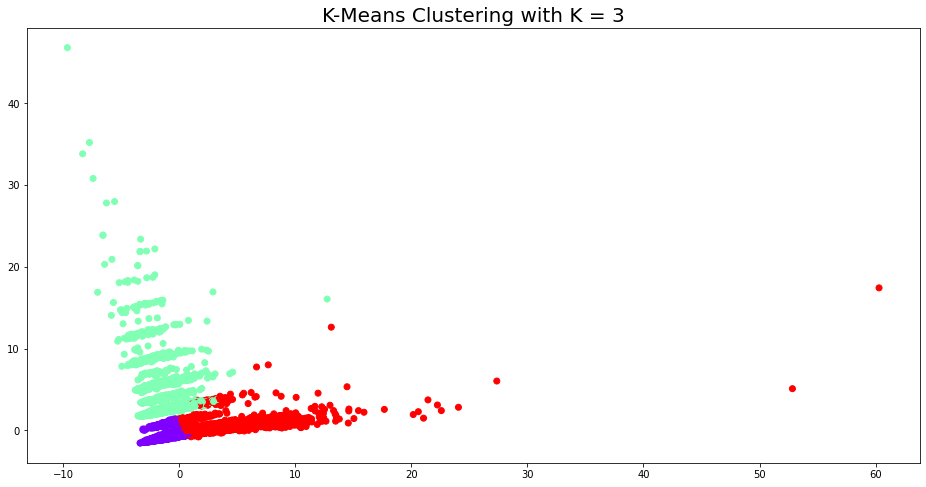

In [70]:
# importing kmeans
from sklearn.cluster import KMeans

# let's create a kmeans object with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=600, init='k-means++')

# fitting the model to the training data
kmeans.fit(loan_train_ind)

# let's visualize the kmeans clusters

# predIcting the labels for the clusters
label = kmeans.fit_predict(loan_train_ind)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results with k as 2 clusters
plt.figure(figsize=(16, 8))
plt.scatter(loan_train_ind['PCA1'], loan_train_ind['PCA2'], c=label, cmap='rainbow')
plt.title('K-Means Clustering with K = 3', color='black', fontsize=20)
plt.show()

In [64]:
# Evaluating the model
from sklearn.metrics import silhouette_score

score = silhouette_score(loan_train_ind, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.150


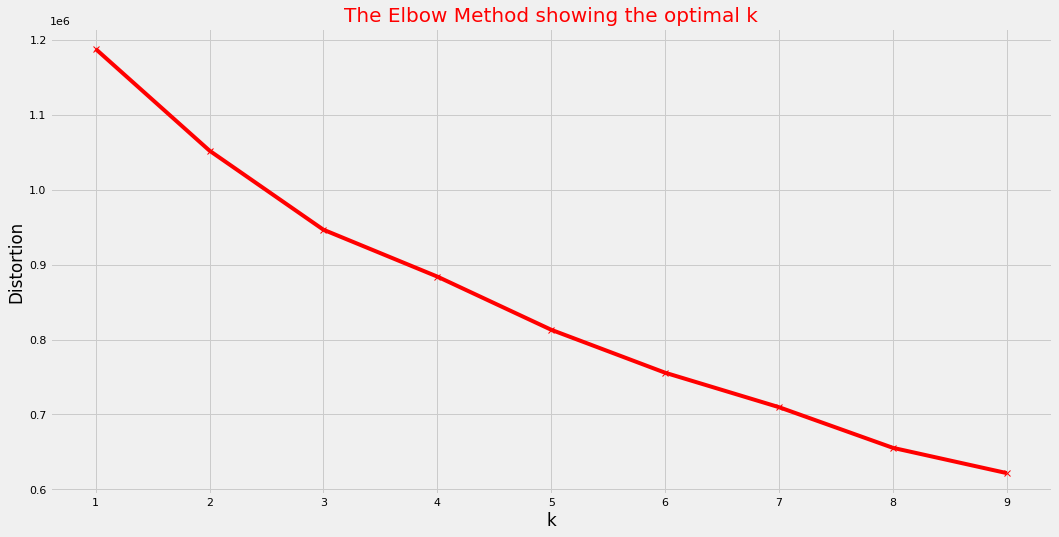

In [194]:
# let's determine the best value of k using elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(loan_train_ind)
    distortions.append(kmeanModel.inertia_)

# let's plot the elbow method
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-', color='red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k', color='red', fontsize=20)
plt.show()

* The elbow method does not give a clear optimal value for k, we shall use silhouette method.

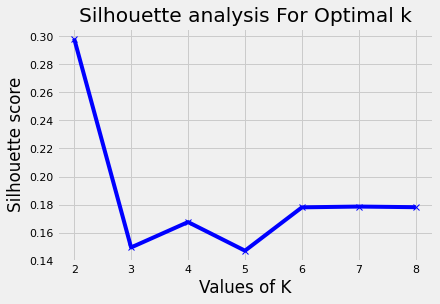

In [195]:
# implementing silhoutte method to find the optimal value of k
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(loan_train_ind)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(loan_train_ind, cluster_labels))

# plotting results
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

* The best value of k is at 6 because its the highest point.

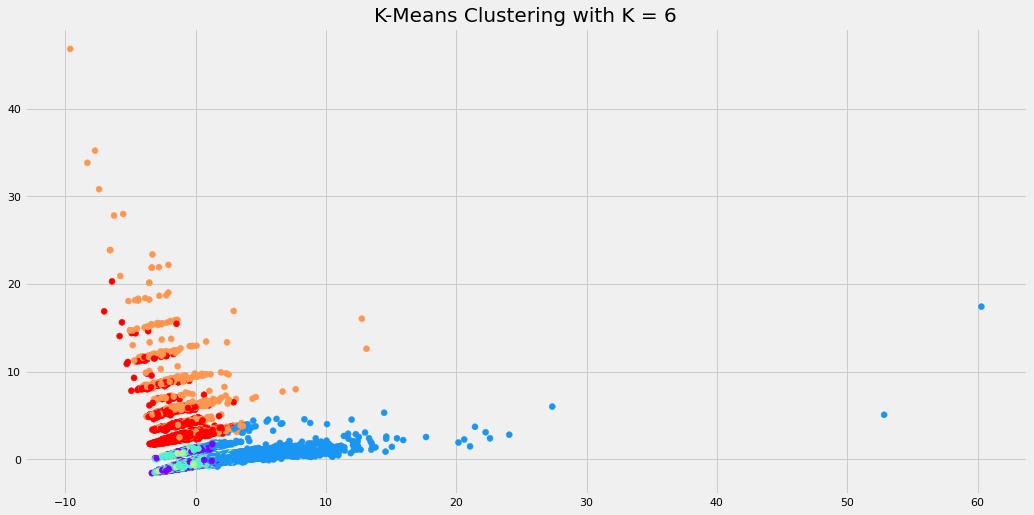

In [196]:
# let's create a kmeans object with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0, max_iter=600, init='k-means++')

# fitting the model to the training data
kmeans.fit(loan_train_ind)

# let's visualize the kmeans clusters

# predIcting the labels for the clusters
label = kmeans.fit_predict(loan_train_ind)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results with k as 2 clusters
plt.figure(figsize=(16, 8))
plt.scatter(loan_train_ind['PCA1'],
            loan_train_ind['PCA2'], c=label, cmap='rainbow')
plt.title('K-Means Clustering with K = 6', color='black', fontsize=20)
plt.show()


In [198]:
# Evaluating the model
from sklearn.metrics import silhouette_score

score = silhouette_score(loan_train_ind, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.179


* There is an evident increase in the silhouette score for k=6.

### DBScan

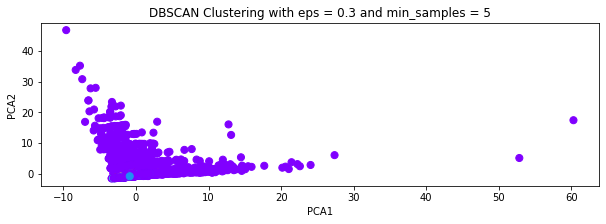

In [78]:
# let's import dbscan
from sklearn.cluster import DBSCAN

# let's create a dbscan object
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(loan_train_ind)

# let's visualize the dbscan clusters
dbscan.labels_



# Plot the clusters
plt.scatter(loan_train_ind['PCA1'], loan_train_ind['PCA2'],
            c=dbscan.labels_, cmap="rainbow", s=50)
plt.xlabel("PCA1")  # X-axis label
plt.title("DBSCAN Clustering with eps = 0.3 and min_samples = 5")  # Plot title
plt.ylabel("PCA2")  # Y-axis label
plt.show()  # showing the plot


In [81]:
# Evaluating the model
from sklearn.metrics import silhouette_score

score = silhouette_score(loan_train_ind, dbscan.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)


Silhouette Score: -0.558


#### Finding PCA Feature Importance Importance with R

In [71]:
# loading the r extension
%load_ext rpy2.ipython

In [73]:
%%R
#calling the libraries
library(factoextra)
library(ggplot2)
library(corrplot)

In [74]:
%%R
# let's load the exported dataset
loan_ <- read.csv("loan_data_ind.csv")

In [75]:
%%R
suppressWarnings(
    suppressMessages(if
                     (!require(psych, quietly=TRUE))
                     install.packages("psych")))
library(psych)
# let's describe the data
describe(loan_)

                          vars     n        mean          sd     median
Loan_Status                  1 85791        0.75        0.43       1.00
Current_Loan_Amount          2 85791 13128803.59 33366583.62  320474.00
Term                         3 85791        0.27        0.44       0.00
Annual_Income                4 85791  1349192.10   996293.34 1174162.00
Years_in_current_job         5 85791        3.76        3.18       3.00
Home_Ownership               6 85791        1.93        0.96       2.00
Purpose                      7 85791        3.77        2.23       3.00
Monthly_Debt                 8 85791    18641.05    12197.80   16363.56
Years_of_Credit_History      9 85791       18.04        6.82      16.90
Number_of_Open_Accounts     10 85791       11.18        5.01      10.00
Number_of_Credit_Problems   11 85791        0.16        0.47       0.00
Current_Credit_Balance      12 85791   296282.13   373701.49  212097.00
Maximum_Open_Credit         13 85791   774865.07  8932842.16  47

In [76]:
%%R
# performing pca
loan_.pca = prcomp(loan_, scale=T)

In [77]:
%%R
# getting pca variables
var = get_pca_var(loan_.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


In [78]:
%%R
#getting the Eigenvalues
eig.val = get_eigenvalue(loan_.pca)
eig.val


       eigenvalue variance.percent cumulative.variance.percent
Dim.1  2.33167477       15.5444984                    15.54450
Dim.2  1.97447753       13.1631835                    28.70768
Dim.3  1.30315806        8.6877204                    37.39540
Dim.4  1.07346671        7.1564448                    44.55185
Dim.5  1.02963273        6.8642182                    51.41607
Dim.6  1.00127539        6.6751693                    58.09123
Dim.7  0.94501294        6.3000863                    64.39132
Dim.8  0.93470599        6.2313733                    70.62269
Dim.9  0.87581259        5.8387506                    76.46144
Dim.10 0.85138688        5.6759125                    82.13736
Dim.11 0.79443552        5.2962368                    87.43359
Dim.12 0.72895098        4.8596732                    92.29327
Dim.13 0.66390116        4.4260077                    96.71927
Dim.14 0.42132915        2.8088610                    99.52814
Dim.15 0.07077962        0.4718641                   10

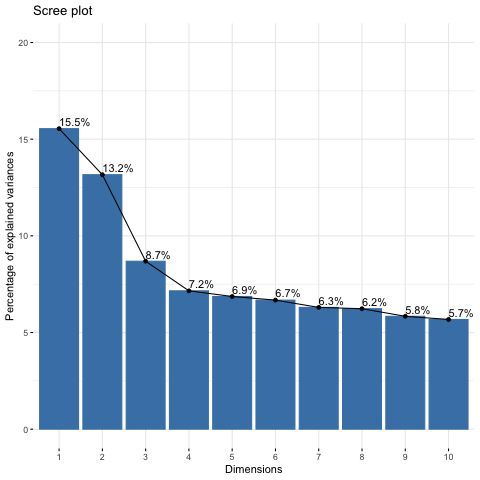

In [79]:
%%R
#Plotting the PCA
fviz_eig(loan_.pca, addlabels=T, ylim=c(0, 20))


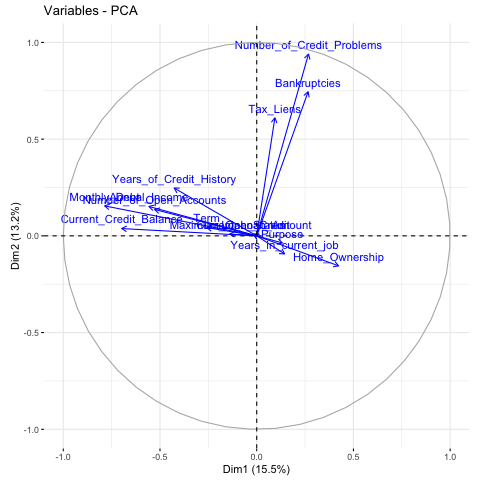

In [80]:
%%R
# let's check the contribution of each variable to the PCA
fviz_pca_var(loan_.pca, col.var = "blue")

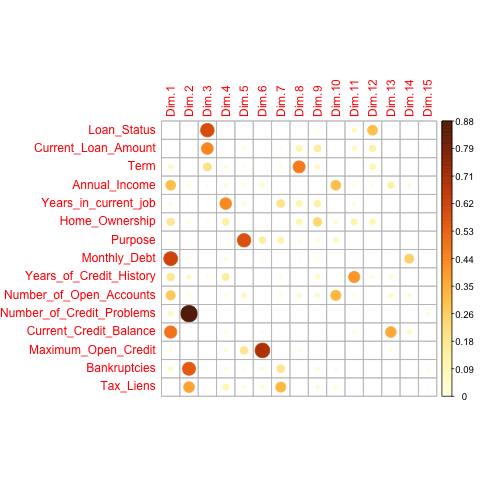

In [81]:
%%R
# check the attribute contribution of each variable to the PCA using correlation plot
corrplot(var$cos2, is.corr=FALSE)# u can also use is.corr=F

* This show how each feature affects each PCA component.

In [130]:
%%R
# let's check the pca value
head(loan_.pca)

Standard deviations (1, .., p=15):
 [1] 1.5269822 1.4051610 1.1415595 1.0360824 1.0147082 1.0006375 0.9721178
 [8] 0.9668019 0.9358486 0.9227063 0.8913111 0.8537863 0.8148013 0.6490987
[15] 0.2660444

Rotation (n x k) = (15 x 15):
                                   PC1          PC2         PC3          PC4
Loan_Status               -0.011091078  0.005829852 -0.67214821 -0.026495839
Current_Loan_Amount       -0.009319693  0.006296841 -0.58244313 -0.090725384
Term                      -0.168860042  0.030383394  0.39498990  0.171183196
Annual_Income             -0.364890087  0.108050938 -0.09822117 -0.191480386
Years_in_current_job       0.094456334 -0.066549659  0.07055092 -0.635883605
Home_Ownership             0.277202536 -0.110357354  0.09089054 -0.362199179
Purpose                    0.086563334 -0.026017347 -0.06297644 -0.005547986
Monthly_Debt              -0.514841744  0.110316056  0.04915561 -0.179341990
Years_of_Credit_History   -0.279498549  0.175951339 -0.12051549  0.379770276

* The bigger the value the more the contribution of the feature to the PCA.

### Conclusion

* From the analysis, it is evident that the main purpose loan applications is debt consolidation.

* From the analysis, it was evident that the number of accounts owned by an individual was way above threshold for a few account holders.

* The different classes of fico scores helped in determining the amounts of loans that an individual is eligible for.

* The most important features are the Maximum_Open_Credit and Annual_Income columns in determining the amount of loans that an individual is eligible for.

* The groups of people applying for loans have been given by the Credit_Class column which is generated using fico score metric.

* The data had six different groups of people applying for loans.(clusters)

### Recommendations

* The bank should create attractive loans for to entice its customers as this will reduce loan defaults when the customers dont have many different bills to pay.

* The bank should flag users who have more than 3 open accounts that are registered under the same person and are runnning concurrently. They should also create a system to delete inactive accounts after a duration of 6 month or an agreed time.

* The bank should low interest rates for the customers who have high credit score to encourage those with low credit scores and eventually reduce loan defaults.

* The bank should focus more on customers who open accounts with huge deposits as they will earn them more profits.

### Follow up Questions

a). Did we have the right data?

* Yes. The data was sufficient to perform the analysis.

b). Do we need other data to answer our question?

* No we dont need any other data.

c). Did we have the right question?

* Yes. The question fell in line with the data provided.